In [43]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  0
2.9.1


In [44]:
import pandas as pd   ## data analysis and manipulation
import numpy as np    ## numerial computing
import seaborn as sns ##  data visualization library based on matplotlib
import tensorflow.keras as keras ## main deep learning API

## additional functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

In [46]:
#load the data
df = pd.read_csv("/Users/a123456/Desktop/Fei's Project/Data/OCT_BASELINE_GRI__VF_6-3_FP-15_NO_PHI_CombinedProgression.csv")
df

,EID,PID,DOB,Eye,ImageID,Scan.Type,Diameter..mm.,Diameter....,Fixed.in.mm,ExamDate,...,VF_OCT_BASELINE_DIFF,VF_OCT_FINAL_DIFF,MD_BASELINE,MD_FINAL,VFI_BASELINE,VFI_FINAL,Y_GRI,Y_MD,Y_VFI,Y_combined
0,1,1,10/24/1949,LE,282596.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,0.000000,3.561944,-2.15,-3.26,98,96,0,0,0,0
1,2,1,10/24/1949,RE,282593.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,0.000000,3.561944,-7.73,-11.45,82,73,1,0,0,1
2,3,2,8/7/1939,LE,239514.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,0.000000,6.151951,-1.28,-1.13,98,97,0,0,0,0
3,4,2,8/7/1939,RE,239512.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,0.000000,6.151951,-0.72,0.60,98,99,0,0,0,0
4,5,3,5/20/1943,LE,238460.0,OCT Circle Scan,3.5,12.0,0,7/9/2014,...,0.024641,6.266940,-1.69,-0.51,99,99,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,329,3/22/1952,RE,837.0,OCT Circle Scan,3.7,12.0,0,5/5/2011,...,0.000000,9.601643,0.53,-2.51,98,93,1,0,0,1
580,581,330,5/15/1945,LE,243095.0,OCT Circle Scan,3.5,12.0,0,12/17/2014,...,0.000000,5.941136,-8.97,-14.71,78,56,1,1,1,1
581,582,330,5/15/1945,RE,243093.0,OCT Circle Scan,3.7,12.0,0,12/17/2014,...,0.000000,5.941136,-11.39,-11.37,70,67,1,0,0,1
582,583,331,5/31/1939,LE,109347.0,OCT Circle Scan,3.5,12.0,0,8/13/2013,...,0.172485,6.193018,-3.48,-19.28,97,51,1,1,1,1


In [47]:
#filter only circle scan data
circle_scan = (df['Scan.Type'] == 'OCT Circle Scan')
df = df[circle_scan]
df.shape

(580, 815)

In [48]:
df_raw = df

## 2. GRI only

In [49]:
df = df_raw.iloc[:, np.r_[1, 28:797, 811]]
df

,PID,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,...,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768,GRI,Y_GRI
0,1,47.0,47.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,47.0,-3.688171,0
1,1,70.0,71.0,72.0,72.0,73.0,73.0,73.0,73.0,74.0,...,60.0,61.0,62.0,63.0,65.0,66.0,67.0,69.0,-6.827438,1
2,2,44.0,45.0,45.0,45.0,46.0,47.0,48.0,50.0,51.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,44.0,0.329429,0
3,2,44.0,44.0,44.0,45.0,45.0,46.0,46.0,47.0,47.0,...,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0.581343,0
4,3,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,...,35.0,35.0,35.0,35.0,35.0,35.0,36.0,36.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,329,100.0,103.0,106.0,108.0,111.0,112.0,113.0,113.0,113.0,...,83.0,84.0,86.0,87.0,89.0,92.0,94.0,97.0,-11.691467,1
580,330,52.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,47.0,47.0,48.0,48.0,49.0,49.0,50.0,51.0,-19.908699,1
581,330,62.0,63.0,64.0,65.0,66.0,67.0,68.0,68.0,68.0,...,55.0,56.0,57.0,58.0,58.0,59.0,60.0,61.0,-10.130481,1
582,331,47.0,47.0,48.0,48.0,49.0,49.0,50.0,50.0,50.0,...,47.0,46.0,46.0,45.0,45.0,46.0,46.0,46.0,-24.731627,1


In [50]:
#drop missing values
df = df.dropna()
df.isnull().values.sum()
df.shape

(575, 771)

In [51]:
y = df.iloc[:, 770]
y

0      0
1      1
2      0
3      0
4      0
      ..
579    1
580    1
581    1
582    1
583    1
Name: Y_GRI, Length: 575, dtype: int64

In [52]:
# https://github.com/applied-systems-biology/Dynamic_SPHARM/blob/master/SPHARM/classes/stratified_group_shuffle_split.py

from __future__ import print_function
from __future__ import division

from sklearn.utils.validation import check_array
from sklearn.model_selection import StratifiedShuffleSplit


class GroupShuffleSplitStratified(StratifiedShuffleSplit):

    def __init__(self, n_splits=5, test_size=2, train_size=None, random_state=None):

        super(GroupShuffleSplitStratified, self).__init__(
            n_splits=n_splits,
            test_size=test_size,
            train_size=train_size,
            random_state=random_state)

    def _iter_indices(self, X, y, groups):
        if groups is None:
            raise ValueError("The 'groups' parameter should not be None.")
        groups = check_array(groups, ensure_2d=False, dtype=None)
        groups_unique, group_indices = np.unique(groups, return_inverse=True)
        classes = []
        for gr in groups_unique:
            classes.append(y[np.where(groups==gr)[0][0]])

        for group_train, group_test in super(
                GroupShuffleSplitStratified, self)._iter_indices(X=groups_unique, y=classes):
            # these are the indices of classes in the partition
            # invert them into data indices

            train = np.flatnonzero(np.in1d(group_indices, group_train))
            test = np.flatnonzero(np.in1d(group_indices, group_test))

            yield train, test

    def split(self, X, y=None, groups=None):
        return super(GroupShuffleSplitStratified, self).split(X, y, groups)

In [53]:
train_i,test_i = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(df,y, groups=df['PID']))
TrainVal = df.iloc[train_i]
TestSet = df.iloc[test_i]
print(TrainVal.shape)
print(TestSet.shape)

(523, 771)
(52, 771)


In [54]:
train_id,val_id = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(TrainVal,y.iloc[train_i], groups=TrainVal['PID']))
TrainSet = TrainVal.iloc[train_id]
ValSet = TrainVal.iloc[val_id]
print(TrainSet.shape)
print(ValSet.shape)

(468, 771)
(55, 771)


In [55]:
x = df.iloc[test_i, 1:769]
print(x.isnull().values.sum())
print(x.shape)
x.head()

0
(52, 768)


,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,RNFLT.10,...,RNFLT.759,RNFLT.760,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768
26,34.0,34.0,35.0,35.0,36.0,36.0,37.0,38.0,39.0,39.0,...,34.0,33.0,33.0,33.0,32.0,32.0,32.0,33.0,33.0,33.0
27,42.0,43.0,44.0,45.0,46.0,46.0,47.0,47.0,48.0,48.0,...,41.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,41.0,41.0
51,34.0,35.0,37.0,40.0,42.0,44.0,46.0,47.0,48.0,48.0,...,29.0,29.0,28.0,28.0,28.0,29.0,29.0,30.0,31.0,32.0
52,52.0,52.0,52.0,52.0,52.0,52.0,51.0,51.0,51.0,51.0,...,52.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,52.0,52.0
62,53.0,53.0,53.0,54.0,54.0,55.0,56.0,56.0,57.0,58.0,...,55.0,55.0,55.0,55.0,54.0,54.0,54.0,53.0,53.0,53.0


In [56]:
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_test = scaled_x
print(X_test.shape)

(52, 768, 1)


In [57]:
x = TrainVal.iloc[train_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_train = scaled_x
print(X_train.shape)

(468, 768, 1)


In [58]:
x = TrainVal.iloc[val_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_val = scaled_x
print(X_val.shape)

(55, 768, 1)


In [59]:
#one-hot-encoding our label
y = pd.get_dummies(y)
print(y.value_counts())
y #The second column is 'progressor', The first column is 'non-progressor'

0  1
1  0    407
0  1    168
dtype: int64


,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [60]:
y = y.rename(columns={0: "Non-Progressor", 1: "Progressor"})
y

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [61]:
y_test = y.iloc[test_i]
y_test

,Non-Progressor,Progressor
26,1,0
27,1,0
51,0,1
52,1,0
62,0,1
63,1,0
118,1,0
143,0,1
144,1,0
145,1,0


In [62]:
y_train = y.iloc[train_i].iloc[train_id]
y_train

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [63]:
y_val = y.iloc[train_i].iloc[val_id]
y_val

,Non-Progressor,Progressor
12,0,1
16,0,1
17,1,0
28,1,0
29,1,0
49,0,1
50,1,0
60,0,1
88,0,1
89,1,0


In [64]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.value_counts(), '\n')
print(y_val.value_counts(), '\n')
print(y_test.value_counts())

(468, 768, 1)
(52, 768, 1)
(55, 768, 1)
Non-Progressor  Progressor
1               0             331
0               1             137
dtype: int64 

Non-Progressor  Progressor
1               0             38
0               1             17
dtype: int64 

Non-Progressor  Progressor
1               0             38
0               1             14
dtype: int64


### 2.1 No resampling

#### 2.1.1 Original model

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=400,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [66]:
#create model1
model_211 = Sequential()

#add layers
model_211.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_211.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_211.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_211.add(Flatten())
model_211.add(Dense(64, activation='relu'))
model_211.add(Dense(16, activation='relu'))
model_211.add(Dense(2, activation='softmax'))
model_211.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_2 (Flatten)         (None, 16320)             0         
                                                                 
 dense_5 (Dense)             (None, 64)                1044544   
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                      

In [67]:
model_211.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_211.fit(X_train, y_train, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
15/15 [==============================] - 1s 32ms/step - loss: 0.6613 - accuracy: 0.6774 - val_loss: 0.6152 - val_accuracy: 0.6909
Epoch 2/500
15/15 [==============================] - 0s 22ms/step - loss: 0.6031 - accuracy: 0.7073 - val_loss: 0.6077 - val_accuracy: 0.6909
Epoch 3/500
15/15 [==============================] - 0s 25ms/step - loss: 0.5974 - accuracy: 0.7073 - val_loss: 0.6077 - val_accuracy: 0.6909
Epoch 4/500
15/15 [==============================] - 0s 23ms/step - loss: 0.5971 - accuracy: 0.7073 - val_loss: 0.6050 - val_accuracy: 0.6909
Epoch 5/500
15/15 [==============================] - 0s 24ms/step - loss: 0.5945 - accuracy: 0.7073 - val_loss: 0.6047 - val_accuracy: 0.6909
Epoch 6/500
15/15 [==============================] - 0s 25ms/step - loss: 0.5955 - accuracy: 0.7073 - val_loss: 0.6035 - val_accuracy: 0.6909
Epoch 7/500
15/15 [==============================] - 0s 24ms/step - loss: 0.5944 - accuracy: 0.7073 - val_loss: 0.6038 - val_accuracy: 0.6909
Epoch 

15/15 [==============================] - 0s 23ms/step - loss: 0.5129 - accuracy: 0.7564 - val_loss: 0.5847 - val_accuracy: 0.6727
Epoch 59/500
15/15 [==============================] - 0s 23ms/step - loss: 0.5101 - accuracy: 0.7692 - val_loss: 0.5873 - val_accuracy: 0.6727
Epoch 60/500
15/15 [==============================] - 0s 23ms/step - loss: 0.5105 - accuracy: 0.7543 - val_loss: 0.5899 - val_accuracy: 0.6727
Epoch 61/500
15/15 [==============================] - 0s 25ms/step - loss: 0.5060 - accuracy: 0.7585 - val_loss: 0.5881 - val_accuracy: 0.6909
Epoch 62/500
15/15 [==============================] - 0s 22ms/step - loss: 0.5074 - accuracy: 0.7799 - val_loss: 0.5847 - val_accuracy: 0.6727
Epoch 63/500
15/15 [==============================] - 0s 23ms/step - loss: 0.5032 - accuracy: 0.7650 - val_loss: 0.5950 - val_accuracy: 0.6909
Epoch 64/500
15/15 [==============================] - 0s 24ms/step - loss: 0.5061 - accuracy: 0.7671 - val_loss: 0.5863 - val_accuracy: 0.6727
Epoch 65/500

15/15 [==============================] - 0s 20ms/step - loss: 0.4217 - accuracy: 0.8355 - val_loss: 0.6108 - val_accuracy: 0.7091
Epoch 116/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4155 - accuracy: 0.8312 - val_loss: 0.6136 - val_accuracy: 0.6727
Epoch 117/500
15/15 [==============================] - 0s 20ms/step - loss: 0.4190 - accuracy: 0.8397 - val_loss: 0.6134 - val_accuracy: 0.7091
Epoch 118/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4142 - accuracy: 0.8269 - val_loss: 0.6110 - val_accuracy: 0.6545
Epoch 119/500
15/15 [==============================] - 0s 19ms/step - loss: 0.4135 - accuracy: 0.8355 - val_loss: 0.6125 - val_accuracy: 0.7091
Epoch 120/500
15/15 [==============================] - 0s 22ms/step - loss: 0.4095 - accuracy: 0.8312 - val_loss: 0.6121 - val_accuracy: 0.7091
Epoch 121/500
15/15 [==============================] - 0s 22ms/step - loss: 0.4166 - accuracy: 0.8269 - val_loss: 0.6138 - val_accuracy: 0.6909
Epoch 

Epoch 172/500
15/15 [==============================] - 0s 22ms/step - loss: 0.3373 - accuracy: 0.8761 - val_loss: 0.6669 - val_accuracy: 0.6909
Epoch 173/500
15/15 [==============================] - 0s 22ms/step - loss: 0.3206 - accuracy: 0.8932 - val_loss: 0.6593 - val_accuracy: 0.6727
Epoch 174/500
15/15 [==============================] - 0s 22ms/step - loss: 0.3361 - accuracy: 0.8825 - val_loss: 0.6630 - val_accuracy: 0.6909
Epoch 175/500
15/15 [==============================] - 0s 22ms/step - loss: 0.3345 - accuracy: 0.8825 - val_loss: 0.6641 - val_accuracy: 0.6727
Epoch 176/500
15/15 [==============================] - 0s 22ms/step - loss: 0.3383 - accuracy: 0.8654 - val_loss: 0.6685 - val_accuracy: 0.6727
Epoch 177/500
15/15 [==============================] - 0s 24ms/step - loss: 0.3307 - accuracy: 0.8825 - val_loss: 0.6606 - val_accuracy: 0.6727
Epoch 178/500
15/15 [==============================] - 0s 23ms/step - loss: 0.3266 - accuracy: 0.8803 - val_loss: 0.6649 - val_accuracy:

Epoch 229/500
15/15 [==============================] - 0s 23ms/step - loss: 0.2599 - accuracy: 0.8996 - val_loss: 0.7323 - val_accuracy: 0.6364
Epoch 230/500
15/15 [==============================] - 0s 22ms/step - loss: 0.2678 - accuracy: 0.9124 - val_loss: 0.7376 - val_accuracy: 0.6727
Epoch 231/500
15/15 [==============================] - 0s 22ms/step - loss: 0.2598 - accuracy: 0.9145 - val_loss: 0.7395 - val_accuracy: 0.6727
Epoch 232/500
15/15 [==============================] - 0s 22ms/step - loss: 0.2630 - accuracy: 0.9103 - val_loss: 0.7372 - val_accuracy: 0.6727
Epoch 233/500
15/15 [==============================] - 0s 23ms/step - loss: 0.2462 - accuracy: 0.9124 - val_loss: 0.7460 - val_accuracy: 0.6727
Epoch 234/500
15/15 [==============================] - 0s 22ms/step - loss: 0.2538 - accuracy: 0.9081 - val_loss: 0.7407 - val_accuracy: 0.6727
Epoch 235/500
15/15 [==============================] - 0s 24ms/step - loss: 0.2473 - accuracy: 0.9060 - val_loss: 0.7464 - val_accuracy:

Epoch 286/500
15/15 [==============================] - 0s 23ms/step - loss: 0.1908 - accuracy: 0.9402 - val_loss: 0.8555 - val_accuracy: 0.6364
Epoch 287/500
15/15 [==============================] - 0s 24ms/step - loss: 0.1910 - accuracy: 0.9316 - val_loss: 0.8455 - val_accuracy: 0.6000
Epoch 288/500
15/15 [==============================] - 0s 24ms/step - loss: 0.1852 - accuracy: 0.9380 - val_loss: 0.8486 - val_accuracy: 0.6182
Epoch 289/500
15/15 [==============================] - 0s 23ms/step - loss: 0.1800 - accuracy: 0.9338 - val_loss: 0.8618 - val_accuracy: 0.6727
Epoch 290/500
15/15 [==============================] - 0s 23ms/step - loss: 0.1826 - accuracy: 0.9444 - val_loss: 0.8479 - val_accuracy: 0.6182
Epoch 291/500
15/15 [==============================] - 0s 24ms/step - loss: 0.1827 - accuracy: 0.9402 - val_loss: 0.8536 - val_accuracy: 0.6182
Epoch 292/500
15/15 [==============================] - 0s 22ms/step - loss: 0.1734 - accuracy: 0.9637 - val_loss: 0.8703 - val_accuracy:

Epoch 343/500
15/15 [==============================] - 0s 24ms/step - loss: 0.1340 - accuracy: 0.9573 - val_loss: 0.9832 - val_accuracy: 0.6364
Epoch 344/500
15/15 [==============================] - 0s 23ms/step - loss: 0.1386 - accuracy: 0.9573 - val_loss: 1.0085 - val_accuracy: 0.6364
Epoch 345/500
15/15 [==============================] - 0s 22ms/step - loss: 0.1386 - accuracy: 0.9573 - val_loss: 0.9808 - val_accuracy: 0.6364
Epoch 346/500
15/15 [==============================] - 0s 22ms/step - loss: 0.1435 - accuracy: 0.9509 - val_loss: 0.9688 - val_accuracy: 0.6182
Epoch 347/500
15/15 [==============================] - 0s 23ms/step - loss: 0.1313 - accuracy: 0.9637 - val_loss: 0.9969 - val_accuracy: 0.6364
Epoch 348/500
15/15 [==============================] - 0s 23ms/step - loss: 0.1349 - accuracy: 0.9594 - val_loss: 0.9719 - val_accuracy: 0.6364
Epoch 349/500
15/15 [==============================] - 0s 24ms/step - loss: 0.1235 - accuracy: 0.9744 - val_loss: 0.9807 - val_accuracy:

Epoch 400/500
15/15 [==============================] - 0s 22ms/step - loss: 0.0922 - accuracy: 0.9765 - val_loss: 1.1196 - val_accuracy: 0.6545
Epoch 401/500
15/15 [==============================] - 0s 24ms/step - loss: 0.0917 - accuracy: 0.9808 - val_loss: 1.1130 - val_accuracy: 0.6182
Epoch 402/500
15/15 [==============================] - 0s 24ms/step - loss: 0.0887 - accuracy: 0.9808 - val_loss: 1.1159 - val_accuracy: 0.6364
Epoch 403/500
15/15 [==============================] - 0s 23ms/step - loss: 0.0914 - accuracy: 0.9786 - val_loss: 1.1270 - val_accuracy: 0.6182
Epoch 404/500
15/15 [==============================] - 0s 22ms/step - loss: 0.0927 - accuracy: 0.9808 - val_loss: 1.1231 - val_accuracy: 0.6364
Epoch 405/500
15/15 [==============================] - 0s 24ms/step - loss: 0.1019 - accuracy: 0.9786 - val_loss: 1.1109 - val_accuracy: 0.6364
Epoch 406/500
15/15 [==============================] - 0s 27ms/step - loss: 0.0944 - accuracy: 0.9786 - val_loss: 1.1422 - val_accuracy:

Epoch 457/500
15/15 [==============================] - 0s 22ms/step - loss: 0.0829 - accuracy: 0.9829 - val_loss: 1.2556 - val_accuracy: 0.6182
Epoch 458/500
15/15 [==============================] - 0s 22ms/step - loss: 0.0635 - accuracy: 0.9829 - val_loss: 1.2637 - val_accuracy: 0.6545
Epoch 459/500
15/15 [==============================] - 0s 22ms/step - loss: 0.0587 - accuracy: 0.9915 - val_loss: 1.2834 - val_accuracy: 0.6364
Epoch 460/500
15/15 [==============================] - 0s 22ms/step - loss: 0.0632 - accuracy: 0.9872 - val_loss: 1.2545 - val_accuracy: 0.6364
Epoch 461/500
15/15 [==============================] - 0s 23ms/step - loss: 0.0704 - accuracy: 0.9872 - val_loss: 1.2948 - val_accuracy: 0.6364
Epoch 462/500
15/15 [==============================] - 0s 23ms/step - loss: 0.0620 - accuracy: 0.9872 - val_loss: 1.2651 - val_accuracy: 0.6182
Epoch 463/500
15/15 [==============================] - 0s 23ms/step - loss: 0.0729 - accuracy: 0.9786 - val_loss: 1.2754 - val_accuracy:

**For test set:**

In [68]:
m1_eval_test = model_211.evaluate(X_test, y_test)
m1_eval_val = model_211.evaluate(X_val, y_val)

2/2 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.7273


In [69]:
pred = model_211.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 7ms/step
roc auc score:  0.5883458646616542
average precision score:  0.5778466684760469


In [70]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 6ms/step - loss: 0.6340 - accuracy: 0.6923


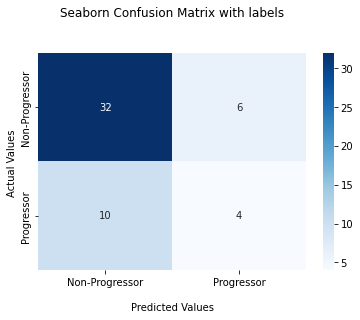

In [71]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_211.evaluate(X_test, y_test)
plt.show()

**For validation set:**

In [72]:
pred = model_211.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 6ms/step
roc auc score:  0.6594427244582044
average precision score:  0.6459363967192853


In [73]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 7ms/step - loss: 0.5949 - accuracy: 0.7273


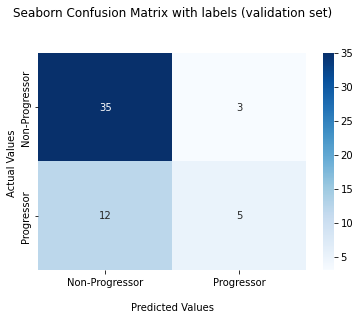

In [74]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_211.evaluate(X_val, y_val)
plt.show()

#### 1.1.2 Alvin's model

In [75]:
#create model1
model_212 = Sequential()

#add layers
model_212.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_212.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_212.add(Flatten())
model_212.add(Dense(112, activation='relu'))
model_212.add(Dense(2, activation='softmax'))
model_212.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 766, 64)           256       
                                                                 
 conv1d_5 (Conv1D)           (None, 764, 32)           6176      
                                                                 
 flatten_3 (Flatten)         (None, 24448)             0         
                                                                 
 dense_8 (Dense)             (None, 112)               2738288   
                                                                 
 dense_9 (Dense)             (None, 2)                 226       
                                                                 
Total params: 2,744,946
Trainable params: 2,744,946
Non-trainable params: 0
_________________________________________________________________


In [76]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=400,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [77]:
model_212.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_212.fit(X_train, y_train, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
15/15 [==============================] - 1s 40ms/step - loss: 0.6094 - accuracy: 0.7073 - val_loss: 0.6215 - val_accuracy: 0.6909
Epoch 2/500
15/15 [==============================] - 0s 30ms/step - loss: 0.6060 - accuracy: 0.7073 - val_loss: 0.6041 - val_accuracy: 0.6909
Epoch 3/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5931 - accuracy: 0.7073 - val_loss: 0.6078 - val_accuracy: 0.6909
Epoch 4/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5898 - accuracy: 0.7073 - val_loss: 0.6009 - val_accuracy: 0.6909
Epoch 5/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5919 - accuracy: 0.7073 - val_loss: 0.6017 - val_accuracy: 0.6909
Epoch 6/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5860 - accuracy: 0.7073 - val_loss: 0.5971 - val_accuracy: 0.6909
Epoch 7/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5860 - accuracy: 0.7073 - val_loss: 0.5956 - val_accuracy: 0.6909
Epoch 

15/15 [==============================] - 0s 31ms/step - loss: 0.3965 - accuracy: 0.8333 - val_loss: 0.6399 - val_accuracy: 0.6909
Epoch 59/500
15/15 [==============================] - 0s 32ms/step - loss: 0.3916 - accuracy: 0.8440 - val_loss: 0.6270 - val_accuracy: 0.7091
Epoch 60/500
15/15 [==============================] - 0s 32ms/step - loss: 0.3909 - accuracy: 0.8376 - val_loss: 0.6724 - val_accuracy: 0.7273
Epoch 61/500
15/15 [==============================] - 0s 31ms/step - loss: 0.3865 - accuracy: 0.8291 - val_loss: 0.6217 - val_accuracy: 0.6909
Epoch 62/500
15/15 [==============================] - 0s 31ms/step - loss: 0.3806 - accuracy: 0.8355 - val_loss: 0.6199 - val_accuracy: 0.6909
Epoch 63/500
15/15 [==============================] - 0s 30ms/step - loss: 0.3752 - accuracy: 0.8504 - val_loss: 0.6519 - val_accuracy: 0.6909
Epoch 64/500
15/15 [==============================] - 0s 33ms/step - loss: 0.3713 - accuracy: 0.8440 - val_loss: 0.6331 - val_accuracy: 0.6909
Epoch 65/500

15/15 [==============================] - 0s 31ms/step - loss: 0.2187 - accuracy: 0.9188 - val_loss: 0.8382 - val_accuracy: 0.6364
Epoch 116/500
15/15 [==============================] - 0s 32ms/step - loss: 0.2216 - accuracy: 0.9103 - val_loss: 0.8574 - val_accuracy: 0.6545
Epoch 117/500
15/15 [==============================] - 0s 32ms/step - loss: 0.2607 - accuracy: 0.8996 - val_loss: 0.9038 - val_accuracy: 0.6909
Epoch 118/500
15/15 [==============================] - 0s 31ms/step - loss: 0.2209 - accuracy: 0.9188 - val_loss: 0.8639 - val_accuracy: 0.6545
Epoch 119/500
15/15 [==============================] - 0s 33ms/step - loss: 0.2096 - accuracy: 0.9231 - val_loss: 0.8426 - val_accuracy: 0.6364
Epoch 120/500
15/15 [==============================] - 0s 32ms/step - loss: 0.2078 - accuracy: 0.9252 - val_loss: 0.8538 - val_accuracy: 0.6364
Epoch 121/500
15/15 [==============================] - 0s 33ms/step - loss: 0.2070 - accuracy: 0.9274 - val_loss: 0.8534 - val_accuracy: 0.6364
Epoch 

Epoch 172/500
15/15 [==============================] - 0s 33ms/step - loss: 0.1076 - accuracy: 0.9786 - val_loss: 1.2019 - val_accuracy: 0.6000
Epoch 173/500
15/15 [==============================] - 0s 32ms/step - loss: 0.1068 - accuracy: 0.9722 - val_loss: 1.2213 - val_accuracy: 0.6000
Epoch 174/500
15/15 [==============================] - 0s 32ms/step - loss: 0.1046 - accuracy: 0.9722 - val_loss: 1.2202 - val_accuracy: 0.6182
Epoch 175/500
15/15 [==============================] - 0s 31ms/step - loss: 0.1055 - accuracy: 0.9786 - val_loss: 1.2435 - val_accuracy: 0.6000
Epoch 176/500
15/15 [==============================] - 0s 32ms/step - loss: 0.1057 - accuracy: 0.9615 - val_loss: 1.2664 - val_accuracy: 0.6364
Epoch 177/500
15/15 [==============================] - 0s 30ms/step - loss: 0.0983 - accuracy: 0.9722 - val_loss: 1.2485 - val_accuracy: 0.6000
Epoch 178/500
15/15 [==============================] - 0s 31ms/step - loss: 0.0971 - accuracy: 0.9850 - val_loss: 1.2836 - val_accuracy:

Epoch 229/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0462 - accuracy: 0.9893 - val_loss: 1.8129 - val_accuracy: 0.5818
Epoch 230/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0533 - accuracy: 0.9915 - val_loss: 1.8288 - val_accuracy: 0.5818
Epoch 231/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0492 - accuracy: 0.9893 - val_loss: 1.8467 - val_accuracy: 0.6364
Epoch 232/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 1.8631 - val_accuracy: 0.5273
Epoch 233/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0468 - accuracy: 0.9915 - val_loss: 1.8598 - val_accuracy: 0.5273
Epoch 234/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0457 - accuracy: 0.9915 - val_loss: 1.8913 - val_accuracy: 0.6364
Epoch 235/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0499 - accuracy: 0.9893 - val_loss: 1.9122 - val_accuracy:

Epoch 286/500
15/15 [==============================] - 0s 31ms/step - loss: 0.0191 - accuracy: 0.9957 - val_loss: 2.5582 - val_accuracy: 0.5636
Epoch 287/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 2.5525 - val_accuracy: 0.5273
Epoch 288/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0162 - accuracy: 0.9979 - val_loss: 2.5782 - val_accuracy: 0.5818
Epoch 289/500
15/15 [==============================] - 1s 34ms/step - loss: 0.0158 - accuracy: 0.9979 - val_loss: 2.6004 - val_accuracy: 0.5818
Epoch 290/500
15/15 [==============================] - 1s 34ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 2.6221 - val_accuracy: 0.5818
Epoch 291/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 2.6155 - val_accuracy: 0.5818
Epoch 292/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0150 - accuracy: 0.9979 - val_loss: 2.6364 - val_accuracy:

Epoch 343/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.2198 - val_accuracy: 0.5818
Epoch 344/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.2466 - val_accuracy: 0.5636
Epoch 345/500
15/15 [==============================] - 0s 31ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 3.2490 - val_accuracy: 0.5273
Epoch 346/500
15/15 [==============================] - 0s 31ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.2741 - val_accuracy: 0.5818
Epoch 347/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.2749 - val_accuracy: 0.5455
Epoch 348/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.2712 - val_accuracy: 0.5273
Epoch 349/500
15/15 [==============================] - 0s 31ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 3.2755 - val_accuracy:

Epoch 400/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.6788 - val_accuracy: 0.5636
Epoch 401/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.6967 - val_accuracy: 0.5636
Epoch 402/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.6737 - val_accuracy: 0.5455
Epoch 403/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.7081 - val_accuracy: 0.5818
Epoch 404/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.7281 - val_accuracy: 0.5818
Epoch 405/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.6891 - val_accuracy: 0.5455
Epoch 406/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.7005 - val_accuracy:

**For test set:**

In [78]:
m1_eval_test = model_212.evaluate(X_test, y_test)
m1_eval_val = model_212.evaluate(X_val, y_val)

2/2 [==============================] - 0s 6ms/step - loss: 0.5699 - accuracy: 0.7273


In [79]:
pred = model_212.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 5ms/step
roc auc score:  0.6090225563909775
average precision score:  0.5953945779904664


In [80]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

In [81]:
pred

array([[0.7693491 , 0.23065087],
       [0.77742004, 0.22257996],
       [0.60963607, 0.39036396],
       [0.3613364 , 0.6386636 ],
       [0.42655462, 0.5734454 ],
       [0.41279483, 0.58720523],
       [0.6696947 , 0.33030525],
       [0.5877574 , 0.41224253],
       [0.73920995, 0.26079   ],
       [0.78025013, 0.21974985],
       [0.7628834 , 0.23711659],
       [0.8023609 , 0.1976391 ],
       [0.7087888 , 0.29121116],
       [0.8839149 , 0.1160851 ],
       [0.537254  , 0.46274602],
       [0.8384107 , 0.16158934],
       [0.7862765 , 0.21372348],
       [0.8432934 , 0.15670663],
       [0.5517205 , 0.44827944],
       [0.5790524 , 0.42094758],
       [0.5248467 , 0.47515333],
       [0.7729976 , 0.22700237],
       [0.76086885, 0.23913117],
       [0.55006015, 0.44993988],
       [0.74850553, 0.25149447],
       [0.20727625, 0.7927237 ],
       [0.8580525 , 0.14194748],
       [0.9151948 , 0.08480522],
       [0.8497915 , 0.15020856],
       [0.66778815, 0.33221182],
       [0.

2/2 [==============================] - 0s 8ms/step - loss: 0.6037 - accuracy: 0.6923


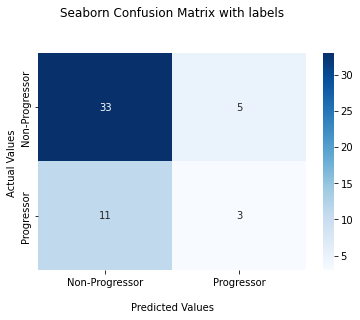

In [82]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_212.evaluate(X_test, y_test)
plt.show()

**For validation set:**

In [83]:
pred = model_212.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 6ms/step
roc auc score:  0.6873065015479876
average precision score:  0.665470286935307


In [84]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 11ms/step - loss: 0.5699 - accuracy: 0.7273


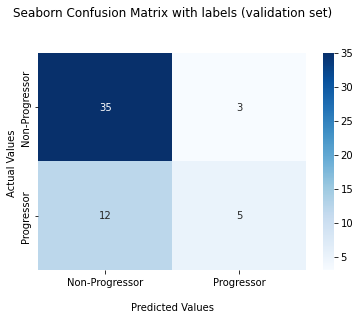

In [85]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_212.evaluate(X_val, y_val)
plt.show()

**Model saving:**

In [86]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import os

In [87]:
# serialize model to JSON
model_211_json = model_211.to_json()
with open("model_211.json", "w") as json_file:
    json_file.write(model_211_json)
# serialize weights to HDF5
model_211.save_weights("model_211.h5")
print("Saved model to disk")

Saved model to disk


In [88]:
# serialize model to JSON
model_212_json = model_212.to_json()
with open("model_212.json", "w") as json_file:
    json_file.write(model_212_json)
# serialize weights to HDF5
model_212.save_weights("model_212.h5")
print("Saved model to disk")

Saved model to disk


### 2.2 With resampling

In [89]:
y_progressor = np.array(y_train)[:,1]
y_progressor

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [90]:
len(y_progressor)

468

In [91]:
X_train.shape

(468, 768, 1)

In [92]:
X_train_2d = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_train_2d.shape

(468, 768)

In [93]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_2d, y_progressor)
print(X_train_over.shape)
y_train_over

(662, 768)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [94]:
y_train_over = pd.get_dummies(y_train_over)
y_train_over

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
657,0,1
658,0,1
659,0,1
660,0,1


In [95]:
y_train_over=y_train_over.rename(columns={0: "Non-Progressor", 1: "Progressor"})
print(y_train_over.value_counts(), '\n')

Non-Progressor  Progressor
0               1             331
1               0             331
dtype: int64 



In [96]:
print(y_train.value_counts(), '\n')

Non-Progressor  Progressor
1               0             331
0               1             137
dtype: int64 



In [97]:
y_train_over

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
657,0,1
658,0,1
659,0,1
660,0,1


In [98]:
X_train_over.shape

(662, 768)

In [99]:
X_train_over = np.reshape(X_train_over, (X_train_over.shape[0], X_train_over.shape[1], 1))
X_train_over

array([[[0.12335958],
        [0.12335958],
        [0.12073491],
        ...,
        [0.12598425],
        [0.12598425],
        [0.12335958]],

       [[0.18372703],
        [0.18635171],
        [0.18897638],
        ...,
        [0.17322835],
        [0.17585302],
        [0.18110236]],

       [[0.11548556],
        [0.11811024],
        [0.11811024],
        ...,
        [0.11811024],
        [0.11811024],
        [0.11548556]],

       ...,

       [[0.15485564],
        [0.15485564],
        [0.15748031],
        ...,
        [0.1496063 ],
        [0.1496063 ],
        [0.15223097]],

       [[0.17585302],
        [0.17585302],
        [0.17847769],
        ...,
        [0.17322835],
        [0.17322835],
        [0.17585302]],

       [[0.11023622],
        [0.11286089],
        [0.11286089],
        ...,
        [0.11023622],
        [0.11023622],
        [0.11023622]]])

#### 2.2.1 Original model

In [100]:
#create model2
model_221 = Sequential()

#add layers
model_221.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_221.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_221.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_221.add(Flatten())
model_221.add(Dense(64, activation='relu'))
model_221.add(Dense(16, activation='relu'))
model_221.add(Dense(2, activation='softmax'))
model_221.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_4 (Flatten)         (None, 16320)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                1044544   
                                                                 
 dense_11 (Dense)            (None, 16)                1040      
                                                      

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=400,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [102]:
model_221.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_221.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 29ms/step - loss: 0.6936 - accuracy: 0.4955 - val_loss: 0.6820 - val_accuracy: 0.6909
Epoch 2/500
21/21 [==============================] - 0s 23ms/step - loss: 0.6913 - accuracy: 0.5106 - val_loss: 0.6861 - val_accuracy: 0.7091
Epoch 3/500
21/21 [==============================] - 0s 23ms/step - loss: 0.6906 - accuracy: 0.5378 - val_loss: 0.6841 - val_accuracy: 0.6364
Epoch 4/500
21/21 [==============================] - 0s 24ms/step - loss: 0.6888 - accuracy: 0.5453 - val_loss: 0.6802 - val_accuracy: 0.6727
Epoch 5/500
21/21 [==============================] - 0s 22ms/step - loss: 0.6861 - accuracy: 0.5816 - val_loss: 0.6773 - val_accuracy: 0.6364
Epoch 6/500
21/21 [==============================] - 0s 23ms/step - loss: 0.6840 - accuracy: 0.5650 - val_loss: 0.6812 - val_accuracy: 0.6000
Epoch 7/500
21/21 [==============================] - 0s 22ms/step - loss: 0.6809 - accuracy: 0.6027 - val_loss: 0.6585 - val_accuracy: 0.6909
Epoch 

21/21 [==============================] - 0s 22ms/step - loss: 0.4919 - accuracy: 0.7870 - val_loss: 0.6624 - val_accuracy: 0.6000
Epoch 59/500
21/21 [==============================] - 0s 21ms/step - loss: 0.4952 - accuracy: 0.7719 - val_loss: 0.6682 - val_accuracy: 0.6364
Epoch 60/500
21/21 [==============================] - 0s 22ms/step - loss: 0.4866 - accuracy: 0.7810 - val_loss: 0.6512 - val_accuracy: 0.6182
Epoch 61/500
21/21 [==============================] - 0s 23ms/step - loss: 0.4879 - accuracy: 0.7870 - val_loss: 0.6872 - val_accuracy: 0.6545
Epoch 62/500
21/21 [==============================] - 0s 22ms/step - loss: 0.4782 - accuracy: 0.7870 - val_loss: 0.6525 - val_accuracy: 0.6182
Epoch 63/500
21/21 [==============================] - 0s 22ms/step - loss: 0.4805 - accuracy: 0.7840 - val_loss: 0.6836 - val_accuracy: 0.6182
Epoch 64/500
21/21 [==============================] - 0s 23ms/step - loss: 0.4699 - accuracy: 0.7961 - val_loss: 0.6716 - val_accuracy: 0.6182
Epoch 65/500

21/21 [==============================] - 1s 24ms/step - loss: 0.3386 - accuracy: 0.8656 - val_loss: 0.7854 - val_accuracy: 0.6182
Epoch 116/500
21/21 [==============================] - 0s 22ms/step - loss: 0.3346 - accuracy: 0.8489 - val_loss: 0.7557 - val_accuracy: 0.6000
Epoch 117/500
21/21 [==============================] - 0s 22ms/step - loss: 0.3250 - accuracy: 0.8656 - val_loss: 0.7400 - val_accuracy: 0.6000
Epoch 118/500
21/21 [==============================] - 0s 23ms/step - loss: 0.3271 - accuracy: 0.8610 - val_loss: 0.7438 - val_accuracy: 0.6000
Epoch 119/500
21/21 [==============================] - 0s 22ms/step - loss: 0.3177 - accuracy: 0.8731 - val_loss: 0.7358 - val_accuracy: 0.6182
Epoch 120/500
21/21 [==============================] - 0s 22ms/step - loss: 0.3192 - accuracy: 0.8837 - val_loss: 0.7605 - val_accuracy: 0.6000
Epoch 121/500
21/21 [==============================] - 0s 22ms/step - loss: 0.3219 - accuracy: 0.8610 - val_loss: 0.7464 - val_accuracy: 0.6000
Epoch 

Epoch 172/500
21/21 [==============================] - 0s 23ms/step - loss: 0.2028 - accuracy: 0.9350 - val_loss: 0.8654 - val_accuracy: 0.6364
Epoch 173/500
21/21 [==============================] - 0s 22ms/step - loss: 0.1960 - accuracy: 0.9471 - val_loss: 0.8842 - val_accuracy: 0.6364
Epoch 174/500
21/21 [==============================] - 0s 21ms/step - loss: 0.2081 - accuracy: 0.9199 - val_loss: 0.9222 - val_accuracy: 0.5818
Epoch 175/500
21/21 [==============================] - 0s 20ms/step - loss: 0.2003 - accuracy: 0.9441 - val_loss: 0.9651 - val_accuracy: 0.5818
Epoch 176/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1884 - accuracy: 0.9426 - val_loss: 0.9395 - val_accuracy: 0.5818
Epoch 177/500
21/21 [==============================] - 0s 21ms/step - loss: 0.1830 - accuracy: 0.9471 - val_loss: 0.9349 - val_accuracy: 0.5818
Epoch 178/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1840 - accuracy: 0.9411 - val_loss: 0.9159 - val_accuracy:

Epoch 229/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1141 - accuracy: 0.9728 - val_loss: 1.0470 - val_accuracy: 0.6364
Epoch 230/500
21/21 [==============================] - 0s 22ms/step - loss: 0.1134 - accuracy: 0.9668 - val_loss: 1.0628 - val_accuracy: 0.6545
Epoch 231/500
21/21 [==============================] - 0s 22ms/step - loss: 0.1066 - accuracy: 0.9713 - val_loss: 1.0780 - val_accuracy: 0.6182
Epoch 232/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1069 - accuracy: 0.9698 - val_loss: 1.0464 - val_accuracy: 0.6545
Epoch 233/500
21/21 [==============================] - 0s 22ms/step - loss: 0.1014 - accuracy: 0.9698 - val_loss: 1.0871 - val_accuracy: 0.6364
Epoch 234/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1011 - accuracy: 0.9758 - val_loss: 1.1046 - val_accuracy: 0.6182
Epoch 235/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0993 - accuracy: 0.9789 - val_loss: 1.0916 - val_accuracy:

Epoch 286/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0624 - accuracy: 0.9894 - val_loss: 1.2320 - val_accuracy: 0.6364
Epoch 287/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0602 - accuracy: 0.9924 - val_loss: 1.2412 - val_accuracy: 0.6364
Epoch 288/500
21/21 [==============================] - 1s 24ms/step - loss: 0.0592 - accuracy: 0.9864 - val_loss: 1.2263 - val_accuracy: 0.6909
Epoch 289/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0631 - accuracy: 0.9879 - val_loss: 1.2359 - val_accuracy: 0.6545
Epoch 290/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0501 - accuracy: 0.9940 - val_loss: 1.2307 - val_accuracy: 0.6727
Epoch 291/500
21/21 [==============================] - 0s 21ms/step - loss: 0.0581 - accuracy: 0.9894 - val_loss: 1.2340 - val_accuracy: 0.6727
Epoch 292/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0504 - accuracy: 0.9924 - val_loss: 1.2585 - val_accuracy:

Epoch 343/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0269 - accuracy: 0.9955 - val_loss: 1.4634 - val_accuracy: 0.6727
Epoch 344/500
21/21 [==============================] - 0s 21ms/step - loss: 0.0288 - accuracy: 0.9985 - val_loss: 1.4368 - val_accuracy: 0.6545
Epoch 345/500
21/21 [==============================] - 0s 20ms/step - loss: 0.0367 - accuracy: 0.9909 - val_loss: 1.4151 - val_accuracy: 0.6909
Epoch 346/500
21/21 [==============================] - 0s 21ms/step - loss: 0.0375 - accuracy: 0.9955 - val_loss: 1.4036 - val_accuracy: 0.6727
Epoch 347/500
21/21 [==============================] - 0s 21ms/step - loss: 0.0306 - accuracy: 0.9924 - val_loss: 1.4870 - val_accuracy: 0.6727
Epoch 348/500
21/21 [==============================] - 0s 20ms/step - loss: 0.0275 - accuracy: 0.9985 - val_loss: 1.4602 - val_accuracy: 0.6909
Epoch 349/500
21/21 [==============================] - 0s 21ms/step - loss: 0.0322 - accuracy: 0.9940 - val_loss: 1.4669 - val_accuracy:

Epoch 400/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0200 - accuracy: 0.9985 - val_loss: 1.5725 - val_accuracy: 0.6909
Epoch 401/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0177 - accuracy: 0.9970 - val_loss: 1.5989 - val_accuracy: 0.6909
Epoch 402/500
21/21 [==============================] - 0s 24ms/step - loss: 0.0215 - accuracy: 0.9955 - val_loss: 1.6048 - val_accuracy: 0.6545
Epoch 403/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 0.9970 - val_loss: 1.6355 - val_accuracy: 0.6909
Epoch 404/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0187 - accuracy: 0.9955 - val_loss: 1.6218 - val_accuracy: 0.6909
Epoch 405/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0125 - accuracy: 0.9985 - val_loss: 1.6360 - val_accuracy: 0.6364
Epoch 406/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0174 - accuracy: 0.9970 - val_loss: 1.6760 - val_accuracy:

In [103]:
m2_eval_test = model_221.evaluate(X_test, y_test)
m2_eval_val = model_221.evaluate(X_val, y_val)

2/2 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.7455


**For test set:**

In [104]:
pred = model_221.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 6ms/step
roc auc score:  0.7349624060150377
average precision score:  0.6940112346833278


In [105]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 7ms/step - loss: 0.6201 - accuracy: 0.7885


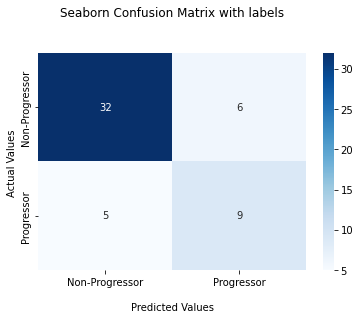

In [106]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_221.evaluate(X_test, y_test)
plt.show()

**For validation set:**

In [107]:
pred = model_221.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 11ms/step
roc auc score:  0.6795665634674923
average precision score:  0.6739399927313978


In [108]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 10ms/step - loss: 0.6309 - accuracy: 0.7455


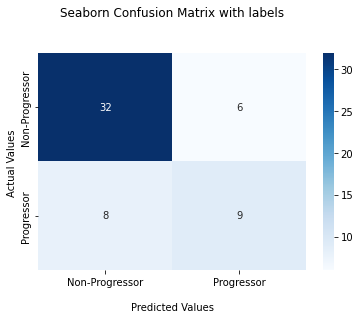

In [109]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_221.evaluate(X_val, y_val)
plt.show()

#### 2.2.2 Alvin's model

In [110]:
#create model1
model_222 = Sequential()

#add layers
model_222.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_222.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_222.add(Flatten())
model_222.add(Dense(112, activation='relu'))
model_222.add(Dense(2, activation='softmax'))
model_222.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 766, 64)           256       
                                                                 
 conv1d_8 (Conv1D)           (None, 764, 32)           6176      
                                                                 
 flatten_5 (Flatten)         (None, 24448)             0         
                                                                 
 dense_13 (Dense)            (None, 112)               2738288   
                                                                 
 dense_14 (Dense)            (None, 2)                 226       
                                                                 
Total params: 2,744,946
Trainable params: 2,744,946
Non-trainable params: 0
_________________________________________________________________


In [111]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=400,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [112]:
model_222.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_222.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 40ms/step - loss: 0.6943 - accuracy: 0.5378 - val_loss: 0.7073 - val_accuracy: 0.3091
Epoch 2/500
21/21 [==============================] - 1s 32ms/step - loss: 0.6900 - accuracy: 0.5423 - val_loss: 0.6647 - val_accuracy: 0.6909
Epoch 3/500
21/21 [==============================] - 1s 33ms/step - loss: 0.6849 - accuracy: 0.5604 - val_loss: 0.6599 - val_accuracy: 0.7455
Epoch 4/500
21/21 [==============================] - 1s 32ms/step - loss: 0.6800 - accuracy: 0.5695 - val_loss: 0.6760 - val_accuracy: 0.6182
Epoch 5/500
21/21 [==============================] - 1s 32ms/step - loss: 0.6745 - accuracy: 0.5846 - val_loss: 0.6176 - val_accuracy: 0.7091
Epoch 6/500
21/21 [==============================] - 1s 31ms/step - loss: 0.6643 - accuracy: 0.6178 - val_loss: 0.6432 - val_accuracy: 0.6364
Epoch 7/500
21/21 [==============================] - 1s 32ms/step - loss: 0.6595 - accuracy: 0.6254 - val_loss: 0.6539 - val_accuracy: 0.6000
Epoch 

21/21 [==============================] - 1s 31ms/step - loss: 0.3414 - accuracy: 0.8580 - val_loss: 0.8103 - val_accuracy: 0.6000
Epoch 59/500
21/21 [==============================] - 1s 32ms/step - loss: 0.3319 - accuracy: 0.8807 - val_loss: 0.8165 - val_accuracy: 0.6364
Epoch 60/500
21/21 [==============================] - 1s 31ms/step - loss: 0.3322 - accuracy: 0.8701 - val_loss: 0.8298 - val_accuracy: 0.6364
Epoch 61/500
21/21 [==============================] - 1s 31ms/step - loss: 0.3320 - accuracy: 0.8731 - val_loss: 0.8605 - val_accuracy: 0.5818
Epoch 62/500
21/21 [==============================] - 1s 31ms/step - loss: 0.3322 - accuracy: 0.8640 - val_loss: 0.8443 - val_accuracy: 0.6000
Epoch 63/500
21/21 [==============================] - 1s 31ms/step - loss: 0.3227 - accuracy: 0.8625 - val_loss: 0.8473 - val_accuracy: 0.6364
Epoch 64/500
21/21 [==============================] - 1s 31ms/step - loss: 0.3090 - accuracy: 0.8882 - val_loss: 0.8630 - val_accuracy: 0.6364
Epoch 65/500

21/21 [==============================] - 1s 31ms/step - loss: 0.1124 - accuracy: 0.9668 - val_loss: 1.4851 - val_accuracy: 0.6182
Epoch 116/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0912 - accuracy: 0.9864 - val_loss: 1.4989 - val_accuracy: 0.6000
Epoch 117/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0888 - accuracy: 0.9819 - val_loss: 1.4944 - val_accuracy: 0.5818
Epoch 118/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0844 - accuracy: 0.9940 - val_loss: 1.5241 - val_accuracy: 0.6000
Epoch 119/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0814 - accuracy: 0.9849 - val_loss: 1.5458 - val_accuracy: 0.6182
Epoch 120/500
21/21 [==============================] - 1s 30ms/step - loss: 0.0850 - accuracy: 0.9849 - val_loss: 1.5828 - val_accuracy: 0.6000
Epoch 121/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0804 - accuracy: 0.9894 - val_loss: 1.5667 - val_accuracy: 0.5818
Epoch 

Epoch 172/500
21/21 [==============================] - 1s 29ms/step - loss: 0.0193 - accuracy: 0.9985 - val_loss: 2.2371 - val_accuracy: 0.6000
Epoch 173/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0178 - accuracy: 0.9985 - val_loss: 2.2607 - val_accuracy: 0.6000
Epoch 174/500
21/21 [==============================] - 1s 30ms/step - loss: 0.0170 - accuracy: 0.9985 - val_loss: 2.2787 - val_accuracy: 0.6000
Epoch 175/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0174 - accuracy: 0.9985 - val_loss: 2.2815 - val_accuracy: 0.6000
Epoch 176/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0172 - accuracy: 0.9985 - val_loss: 2.2668 - val_accuracy: 0.6000
Epoch 177/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0165 - accuracy: 0.9985 - val_loss: 2.2939 - val_accuracy: 0.6000
Epoch 178/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0237 - accuracy: 0.9955 - val_loss: 2.3243 - val_accuracy:

Epoch 229/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.8307 - val_accuracy: 0.5818
Epoch 230/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.8427 - val_accuracy: 0.6000
Epoch 231/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.8612 - val_accuracy: 0.6000
Epoch 232/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.8697 - val_accuracy: 0.6000
Epoch 233/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.8707 - val_accuracy: 0.5818
Epoch 234/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.8869 - val_accuracy: 0.5818
Epoch 235/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.9074 - val_accuracy:

Epoch 286/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.3101 - val_accuracy: 0.5818
Epoch 287/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3160 - val_accuracy: 0.6000
Epoch 288/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.3374 - val_accuracy: 0.5818
Epoch 289/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.3382 - val_accuracy: 0.5818
Epoch 290/500
21/21 [==============================] - 1s 32ms/step - loss: 9.9072e-04 - accuracy: 1.0000 - val_loss: 3.3488 - val_accuracy: 0.5818
Epoch 291/500
21/21 [==============================] - 1s 31ms/step - loss: 9.7415e-04 - accuracy: 1.0000 - val_loss: 3.3490 - val_accuracy: 0.6000
Epoch 292/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3621 - val_a

21/21 [==============================] - 1s 30ms/step - loss: 4.1345e-04 - accuracy: 1.0000 - val_loss: 3.7044 - val_accuracy: 0.5818
Epoch 342/500
21/21 [==============================] - 1s 31ms/step - loss: 4.4743e-04 - accuracy: 1.0000 - val_loss: 3.7052 - val_accuracy: 0.5818
Epoch 343/500
21/21 [==============================] - 1s 31ms/step - loss: 4.6350e-04 - accuracy: 1.0000 - val_loss: 3.7124 - val_accuracy: 0.5818
Epoch 344/500
21/21 [==============================] - 1s 31ms/step - loss: 4.2636e-04 - accuracy: 1.0000 - val_loss: 3.7188 - val_accuracy: 0.5818
Epoch 345/500
21/21 [==============================] - 1s 30ms/step - loss: 4.0325e-04 - accuracy: 1.0000 - val_loss: 3.7235 - val_accuracy: 0.5818
Epoch 346/500
21/21 [==============================] - 1s 31ms/step - loss: 3.9317e-04 - accuracy: 1.0000 - val_loss: 3.7318 - val_accuracy: 0.5818
Epoch 347/500
21/21 [==============================] - 1s 31ms/step - loss: 3.8583e-04 - accuracy: 1.0000 - val_loss: 3.7482 -

21/21 [==============================] - 1s 31ms/step - loss: 1.9264e-04 - accuracy: 1.0000 - val_loss: 4.0495 - val_accuracy: 0.5818
Epoch 397/500
21/21 [==============================] - 1s 31ms/step - loss: 1.9202e-04 - accuracy: 1.0000 - val_loss: 4.0569 - val_accuracy: 0.5818
Epoch 398/500
21/21 [==============================] - 1s 32ms/step - loss: 2.0169e-04 - accuracy: 1.0000 - val_loss: 4.0544 - val_accuracy: 0.5818
Epoch 399/500
21/21 [==============================] - 1s 31ms/step - loss: 1.8063e-04 - accuracy: 1.0000 - val_loss: 4.0683 - val_accuracy: 0.5818
Epoch 400/500
21/21 [==============================] - 1s 30ms/step - loss: 1.7987e-04 - accuracy: 1.0000 - val_loss: 4.0750 - val_accuracy: 0.5818
Epoch 401/500
21/21 [==============================] - 1s 31ms/step - loss: 1.7856e-04 - accuracy: 1.0000 - val_loss: 4.0787 - val_accuracy: 0.5818
Epoch 402/500
21/21 [==============================] - 1s 31ms/step - loss: 1.6692e-04 - accuracy: 1.0000 - val_loss: 4.0844 -

In [113]:
m1_eval_test = model_222.evaluate(X_test, y_test)
m1_eval_val = model_222.evaluate(X_val, y_val)

2/2 [==============================] - 0s 8ms/step - loss: 0.6599 - accuracy: 0.7455


**For test set:**

In [114]:
pred = model_222.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 8ms/step
roc auc score:  0.6917293233082706
average precision score:  0.6319369404120412


In [115]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 5ms/step - loss: 0.6578 - accuracy: 0.7115


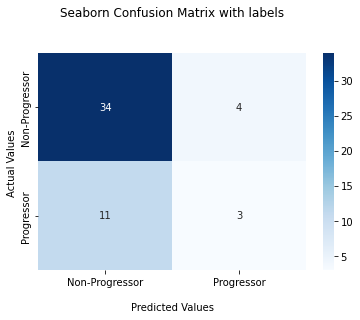

In [116]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_222.evaluate(X_test, y_test)
plt.show()

**For validation set:**

In [117]:
pred = model_222.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 8ms/step
roc auc score:  0.6702786377708978
average precision score:  0.6816161753158589


In [118]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.7455


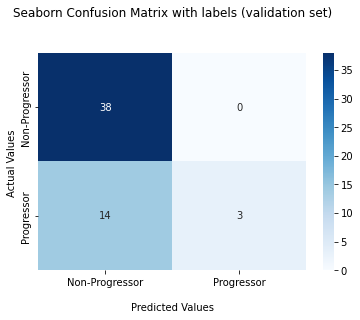

In [119]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_222.evaluate(X_val, y_val)
plt.show()

**Model saving:**

In [120]:
# serialize model to JSON
model_221_json = model_221.to_json()
with open("model_221.json", "w") as json_file:
    json_file.write(model_221_json)
# serialize weights to HDF5
model_221.save_weights("model_221.h5")
print("Saved model to disk")

Saved model to disk


In [121]:
# serialize model to JSON
model_222_json = model_222.to_json()
with open("model_222.json", "w") as json_file:
    json_file.write(model_222_json)
# serialize weights to HDF5
model_222.save_weights("model_222.h5")
print("Saved model to disk")

Saved model to disk
